In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import seaborn as sns

#Sources referred to: 
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
#https://scikit-learn.org/stable/modules/mixture.html
#https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#r5f6cbeb1558e-4

# Multivariate Gaussian Mixture clusters

# First dataset

Means of the clusters:
 [[ 1.87870317  0.26934029]
 [-0.27025138  2.13897499]]
Covariances of the clusters:
 [[[ 1.06410653 -0.09020605]
  [-0.09020605  1.21467465]]

 [[ 1.58641873  0.33950247]
  [ 0.33950247  2.1052514 ]]]


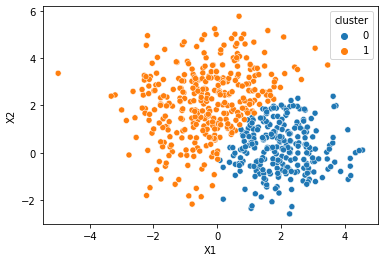

In [2]:
data_x1 = pd.read_csv("C:\\Users\\sraba\\OneDrive\\Documents\\ML_Barbu\\Datasets\\x1.txt", header=None)
data_x1.columns = ["X1","X2"]
fit_object = GaussianMixture(n_components=2, n_init=100, init_params='kmeans').fit(data_x1)
data_x1["cluster"] = fit_object.predict(data_x1)
sns.scatterplot(x="X1", y="X2", hue="cluster", data=data_x1)
print("Means of the clusters:\n", fit_object.means_)
print("Covariances of the clusters:\n", fit_object.covariances_)

# Second dataset

Means of the clusters:
 [[ 0.02268801 -0.04293317]
 [ 0.1779735  -0.13407934]]
Covariances of the clusters:
 [[[1.17480317 0.08689617]
  [0.08689617 0.94800772]]

 [[9.61670072 0.78620178]
  [0.78620178 9.851481  ]]]


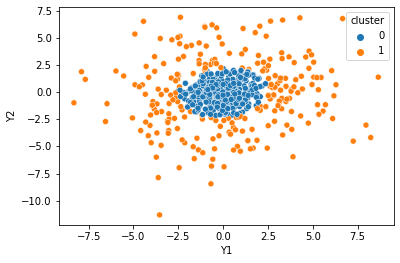

In [3]:
data_x2 = pd.read_csv("C:\\Users\\sraba\\OneDrive\\Documents\\ML_Barbu\\Datasets\\x2.txt", header=None)
data_x2.columns = ["Y1","Y2"]
fit_object = GaussianMixture(n_components=2, n_init=100, init_params='kmeans').fit(data_x2)
data_x2["cluster"] = fit_object.predict(data_x2)
sns.scatterplot(x="Y1", y="Y2", hue="cluster", data=data_x2)
print("Means of the clusters:\n", fit_object.means_)
print("Covariances of the clusters:\n", fit_object.covariances_)

# Third dataset

Means of the clusters:
 [[220.42656249  64.96706177]
 [ 56.37497676  46.5452148 ]
 [194.02965357 147.06674413]]
Covariances of the clusters:
 [[[5426.83512236 -232.04510634]
  [-232.04510634  585.92026552]]

 [[ 296.77377671  151.30389452]
  [ 151.30389452  508.49534834]]

 [[1760.35577959 -287.97783776]
  [-287.97783776  733.37805749]]]


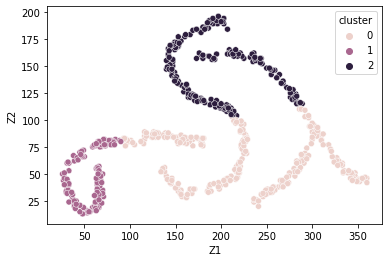

In [4]:
data_pts = pd.read_csv("C:\\Users\\sraba\\OneDrive\\Documents\\ML_Barbu\\Datasets\\pts.txt", header=None)
data_pts.columns = ["Z1","Z2"]
fit_object = GaussianMixture(n_components=3, n_init=100, init_params='kmeans').fit(data_pts)
data_pts["cluster"] = fit_object.predict(data_pts)
sns.scatterplot(x="Z1", y="Z2", hue="cluster", data=data_pts)
print("Means of the clusters:\n", fit_object.means_)
print("Covariances of the clusters:\n", fit_object.covariances_)

# Spectral clusters

# First dataset

<AxesSubplot:xlabel='X1', ylabel='X2'>

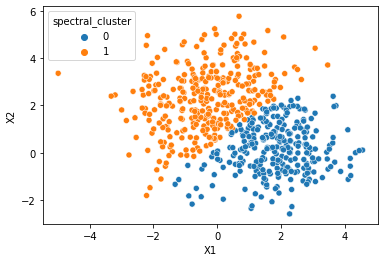

In [5]:
data_x1 = data_x1[["X1","X2"]]
AffinityM = np.exp(- 1./100 * (pairwise_distances(data_x1, metric='sqeuclidean'))**2)
object_spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack',n_init=100, affinity='precomputed', assign_labels='kmeans')
data_x1["spectral_cluster"] = object_spectral.fit_predict(AffinityM)
sns.scatterplot(x="X1", y="X2", hue="spectral_cluster", data=data_x1)

# Second dataset (using kmeans labels as done in other datasets)

<AxesSubplot:xlabel='Y1', ylabel='Y2'>

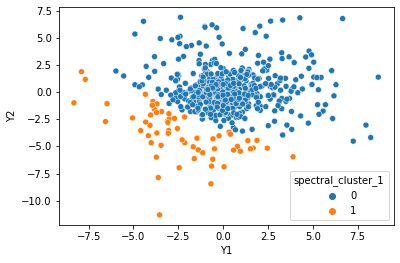

In [6]:
data_x2 = data_x2[["Y1","Y2"]]
AffinityM = np.exp(- 1./100000 * (pairwise_distances(data_x2, metric='sqeuclidean'))**2)
object_spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack',n_init=100, affinity='precomputed', assign_labels='kmeans')
data_x2["spectral_cluster_1"] = object_spectral.fit_predict(AffinityM)
sns.scatterplot(x="Y1", y="Y2", hue="spectral_cluster_1", data=data_x2)

# Second dataset (using cluster_qr labels)

<AxesSubplot:xlabel='Y1', ylabel='Y2'>

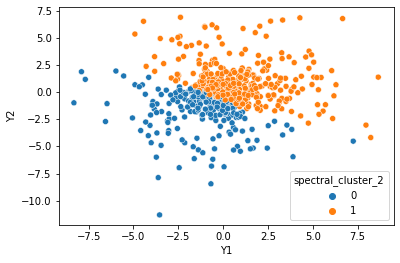

In [7]:
AffinityM = np.exp(- 1./100000000000000000 * (pairwise_distances(data_x2, metric='sqeuclidean'))**2)
object_spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack',n_init=100, affinity='precomputed', assign_labels='cluster_qr')
data_x2["spectral_cluster_2"] = object_spectral.fit_predict(AffinityM)
sns.scatterplot(x="Y1", y="Y2", hue="spectral_cluster_2", data=data_x2)

# Third dataset

<AxesSubplot:xlabel='Z1', ylabel='Z2'>

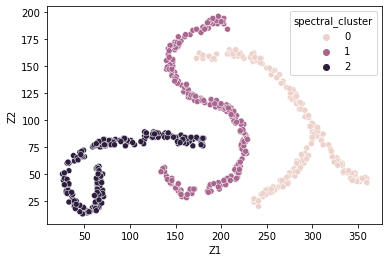

In [8]:
data_pts = data_pts[["Z1","Z2"]]
AffinityM = np.exp(- 1./85000 * (pairwise_distances(data_pts, metric='sqeuclidean'))**2)
object_spectral = SpectralClustering(n_clusters=3, eigen_solver='arpack',n_init=100, affinity='precomputed', assign_labels='kmeans')
data_pts["spectral_cluster"] = object_spectral.fit_predict(AffinityM)
sns.scatterplot(x="Z1", y="Z2", hue="spectral_cluster", data=data_pts)